# HoloLens Data

## Round trip system-hololens, Reception to Update function, frame time of the internal device, and packet loss

In [1]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import re

In [2]:
def descriptive_stats(dataframe, div = 1.0, roundDec = 3, caption = 'Descriptive Statistics', label = 'tab:0'):
    stats = (dataframe.describe(include='all').transpose().filter (['min', '50%','mean', 'max', 'std']).set_axis(['Min.', 'Median', 'Mean', 'Max.', 'Std. Dev.'], axis = 1) / div).round(roundDec)
    latex = re.sub('<([^>]*)>', '\\\\textbf{\g<1>}',
           stats.rename(columns=lambda x: f'<{x}>').to_latex(column_format = '|c||c|c|c|c|c|', bold_rows = True, label = label))
    latex = latex.replace("{}", "\\textbf{Agent Size}")
    latex = latex.replace("\\toprule", "\\hline")
    latex = latex.replace("\\midrule", "\\hline \\hline")
    latex = latex.replace("\\bottomrule", "\\hline")
    latex = latex.replace("\\centering\n\\label{"+label+"}", "\\centering")
    latex = latex.replace("\\end{table}", "\\caption{"+caption+"}\n\\label{"+label+"}\n\\end{table}")
    latex = latex.replace("\\begin{table}", "\\begin{table}[H]")
    print(latex)
    return stats

def processData(frametime_update_task, xlabel, ylabel, figfile, funcMeans):
    print("SIZE: " + str(frametime_update_task.shape[0]))
    
    descriptive_stats(frametime_update_task)

    boxdata = frametime_update_task.transpose().values.tolist()
    fig, ax = plt.subplots()
    ax.boxplot(boxdata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(figfile, bbox_inches='tight')
    plt.show()

    d1, d2, d3, d4, d5, d6, d7, d8 = x = frametime_update_task.transpose().values.tolist()
    levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8)
    print("levene:\n" + str(levene_result))
    anova_result = funcMeans(d1, d2, d3, d4, d5, d6, d7, d8)
    print("Anova or kruskal:\n" + str(anova_result))
    
def mean_std_process(data, ylabelmean, ylabelstd, figfile):
    #Means and Std
    colors = plt.rcParams["axes.prop_cycle"]()
    means = np.mean(data.transpose().values, axis = 1)
    stds = np.std(data.transpose().values, axis = 1)
    agentsize = np.arange(1,9,1)
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    axs[0].plot(agentsize, means, color = next(colors)["color"])
    axs[0].set_title('a) Mean')
    axs[0].set_xlabel('Agent Size')
    axs[0].set_ylabel(ylabelmean)
    axs[1].plot(agentsize, stds, color = next(colors)["color"])
    axs[1].set_title('a) Standard Deviation')
    axs[1].set_xlabel('Agent Size')
    axs[1].set_ylabel(ylabelstd)
    plt.savefig(figfile, bbox_inches='tight')
    plt.show()

def extractGroup(data_collection, name):    
    headers = []
    for i in range(8):
        headers.append(name + str(i+1))
    data = []
    for i in range(8):
        data_collection[i][name].name =str(i+1)
        data.append(data_collection[i][name])   
    return pd.concat(data, axis = 1)


## Round Trip System - HoloLens

SIZE: 371
\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{agent\_ms\_1} &     7.0 &      11.0 &  12.197 &    47.0 &        5.561 \\
\textbf{agent\_ms\_2} &     6.0 &      12.0 &  13.456 &    57.0 &        7.012 \\
\textbf{agent\_ms\_3} &     7.0 &      12.0 &  15.358 &    66.0 &        9.927 \\
\textbf{agent\_ms\_4} &     7.0 &      12.0 &  15.348 &   105.0 &       10.733 \\
\textbf{agent\_ms\_5} &     7.0 &      12.0 &  16.652 &   103.0 &       12.190 \\
\textbf{agent\_ms\_6} &     7.0 &      12.0 &  17.108 &   164.0 &       16.055 \\
\textbf{agent\_ms\_7} &     7.0 &      12.0 &  16.585 &    78.0 &       10.480 \\
\textbf{agent\_ms\_8} &     8.0 &      15.0 &  21.105 &   114.0 &       14.834 \\
\hline
\end{tabular}
\caption{Descriptive Statistics}
\label{tab:0}
\end{table}



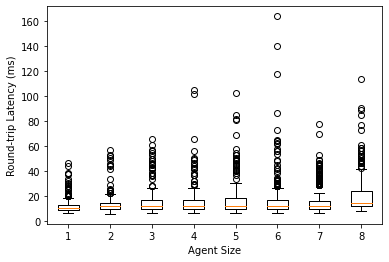

levene:
LeveneResult(statistic=12.780589064114544, pvalue=2.878820022475352e-16)
Anova or kruskal:
KruskalResult(statistic=192.29817147989849, pvalue=4.898800738590927e-38)


<Figure size 432x288 with 0 Axes>

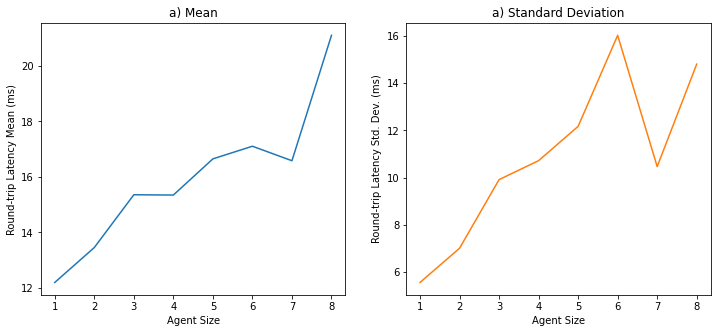

In [3]:
roundtrip_data = pd.read_csv('./FinalDatasets/hololens/system-to-hololens-roundtrip.csv')
roundtrip_data_filtered = roundtrip_data[roundtrip_data.iloc[:, 0] > 0]
for i in range(1, 8):
    roundtrip_data_filtered = roundtrip_data_filtered[roundtrip_data_filtered.iloc[:, i] > 0]
roundtrip_data_filtered
processData(roundtrip_data_filtered, 'Agent Size', 'Round-trip Latency (ms)', 'figures/5-hololens/roundtrip-holo-boxplot.pdf', kruskal)
mean_std_process(roundtrip_data_filtered, 'Round-trip Latency Mean (ms)', 'Round-trip Latency Std. Dev. (ms)', 'figures/5-hololens/roundtrip-holo-mean-std.pdf')

## Reception to Update Function - HoloLens

SIZE: 500
\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{1} &     0.0 &       9.0 &   8.916 &    18.0 &        4.692 \\
\textbf{2} &     0.0 &      10.0 &   9.050 &    18.0 &        5.090 \\
\textbf{3} &     0.0 &      10.0 &   9.534 &    23.0 &        4.894 \\
\textbf{4} &     0.0 &      10.5 &   9.648 &    19.0 &        5.099 \\
\textbf{5} &     0.0 &      10.0 &  10.080 &    20.0 &        4.762 \\
\textbf{6} &     0.0 &      10.0 &   9.634 &    19.0 &        4.834 \\
\textbf{7} &     0.0 &       9.0 &   9.084 &    19.0 &        4.817 \\
\textbf{8} &     0.0 &       9.0 &   9.070 &    18.0 &        4.769 \\
\hline
\end{tabular}
\caption{Descriptive Statistics}
\label{tab:0}
\end{table}



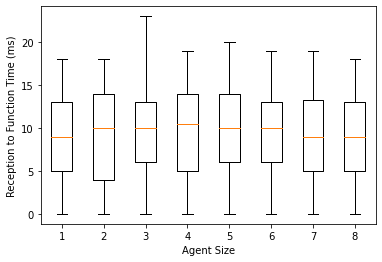

levene:
LeveneResult(statistic=1.834840025734817, pvalue=0.07632725532285631)
Anova or kruskal:
F_onewayResult(statistic=3.484873718329491, pvalue=0.000994649115821257)


<Figure size 432x288 with 0 Axes>

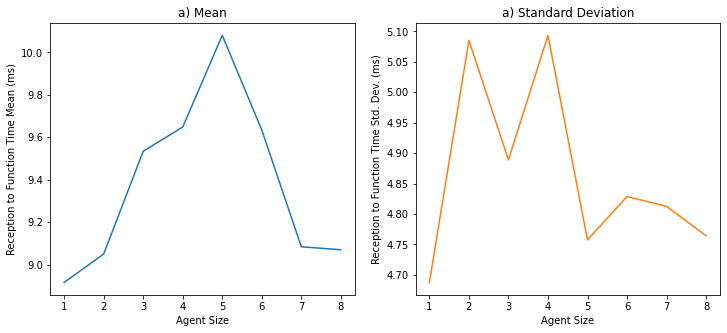

In [4]:
#Load files
internal_holo_data = []
for i in range(1, 9):
    internal_holo_data.append(pd.read_csv('./FinalDatasets/hololens/receptiontoframe-framerate-'+ str(i) +'.csv'))

reception_to_frame_data = extractGroup(internal_holo_data, 'reception-to-frame')
processData(reception_to_frame_data, 'Agent Size', 'Reception to Function Time (ms)', 'figures/5-hololens/reception-to-frame-holo-boxplot.pdf', f_oneway)
mean_std_process(reception_to_frame_data, 'Reception to Function Time Mean (ms)', 'Reception to Function Time Std. Dev. (ms)', 'figures/5-hololens/reception-to-frame-holo-mean-std.pdf')


SIZE: 500
\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{1} &    12.0 &      17.0 &  16.568 &    21.0 &        1.152 \\
\textbf{2} &    13.0 &      17.0 &  16.592 &    20.0 &        1.213 \\
\textbf{3} &    10.0 &      16.0 &  16.526 &    23.0 &        2.444 \\
\textbf{4} &     9.0 &      16.0 &  16.412 &    26.0 &        2.345 \\
\textbf{5} &     7.0 &      16.0 &  16.292 &    28.0 &        2.031 \\
\textbf{6} &     8.0 &      17.0 &  16.522 &    25.0 &        2.296 \\
\textbf{7} &     8.0 &      17.0 &  16.584 &    22.0 &        1.598 \\
\textbf{8} &     8.0 &      16.0 &  16.464 &    21.0 &        1.254 \\
\hline
\end{tabular}
\caption{Descriptive Statistics}
\label{tab:0}
\end{table}



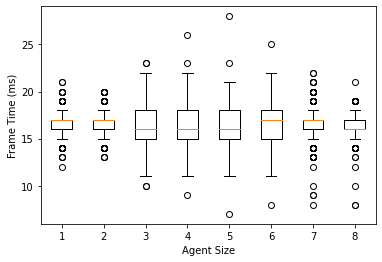

levene:
LeveneResult(statistic=87.15081114392243, pvalue=1.8354998890678209e-118)
Anova or kruskal:
KruskalResult(statistic=14.949775823789777, pvalue=0.03664862125059476)


<Figure size 432x288 with 0 Axes>

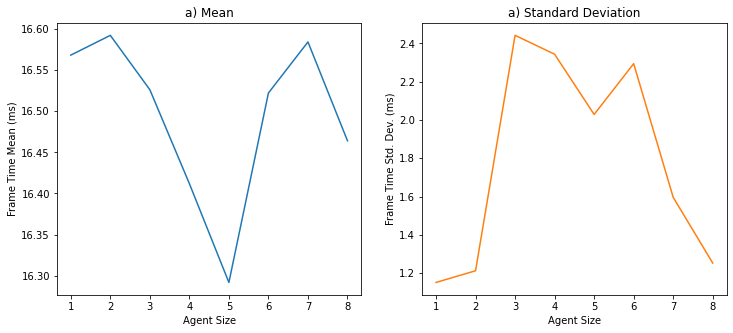

In [5]:
frame_to_frame_data = extractGroup(internal_holo_data, 'frame-time')
processData(frame_to_frame_data, 'Agent Size', 'Frame Time (ms)', 'figures/5-hololens/frame-frame-holo-boxplot.pdf', kruskal)
mean_std_process(frame_to_frame_data, 'Frame Time Mean (ms)', 'Frame Time Std. Dev. (ms)', 'figures/5-hololens/frame-to-frame-holo-mean-std.pdf')


## Packet Loss

SIZE: 30
\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{0} &   16.60 &    19.263 &  19.077 &  21.250 &        1.101 \\
\textbf{1} &   18.25 &    20.300 &  20.798 &  25.150 &        1.955 \\
\textbf{2} &   18.25 &    20.100 &  20.331 &  23.800 &        1.409 \\
\textbf{3} &   18.25 &    20.230 &  20.708 &  24.700 &        1.616 \\
\textbf{4} &   20.05 &    21.650 &  21.720 &  24.550 &        1.084 \\
\textbf{5} &   21.85 &    24.300 &  24.144 &  26.200 &        1.131 \\
\textbf{6} &   21.20 &    23.525 &  23.562 &  26.313 &        1.148 \\
\textbf{7} &   22.00 &    23.850 &  23.890 &  25.900 &        0.982 \\
\hline
\end{tabular}
\caption{Descriptive Statistics}
\label{tab:0}
\end{table}



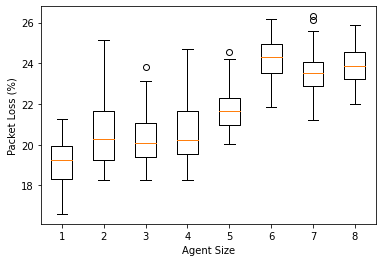

levene:
LeveneResult(statistic=3.2092556050934693, pvalue=0.002893962213161598)
Anova or kruskal:
KruskalResult(statistic=153.78588599876943, pvalue=6.503138339428045e-30)


<Figure size 432x288 with 0 Axes>

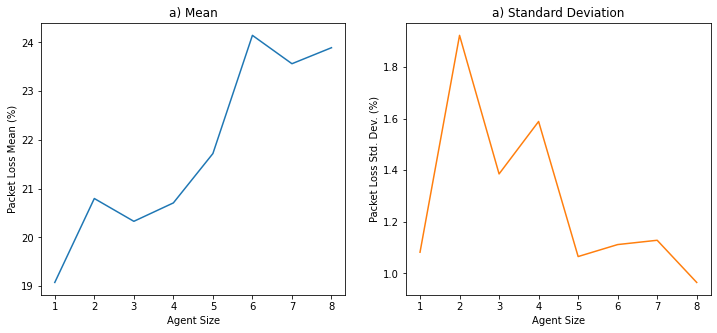

In [6]:
#Load files
packets_holo_data = []
for i in range(1, 9):
    data = pd.read_csv('./FinalDatasets/hololens/packets-system-hololens-'+ str(i) +'.csv')
    pkg_loss = (data['pk_send'] - data['pk_receive']) * 100.0 / data['pk_send']
    packets_holo_data.append(pkg_loss)
packets_holo_data = pd.DataFrame(np.array(packets_holo_data).transpose())
processData(packets_holo_data, 'Agent Size', 'Packet Loss (%)', 'figures/5-hololens/packetloss-holo-boxplot.pdf', kruskal)
mean_std_process(packets_holo_data, 'Packet Loss Mean (%)', 'Packet Loss Std. Dev. (%)', 'figures/5-hololens/packetloss-holo-mean-std.pdf')
